# 앙상블 기법

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y=make_moons(n_samples=500, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred=bag_clf.predict(X_test)

dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
dt_y_pred = dt_clf.predict(X_test)

print(y_pred)
print(dt_y_pred)
print(y_pred.mean(), dt_y_pred.mean())
print(y_pred == dt_y_pred)

[1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1
 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 1]
[1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0
 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 1]
0.52 0.48
[ True  True  True False  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True False  True  True  True

### oob 평가

In [14]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9333333333333333

In [15]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.904

### 배깅 분류기에 있는 결정 트리의 결정 경계 시각화

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, stratify=ym, random_state=42)

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

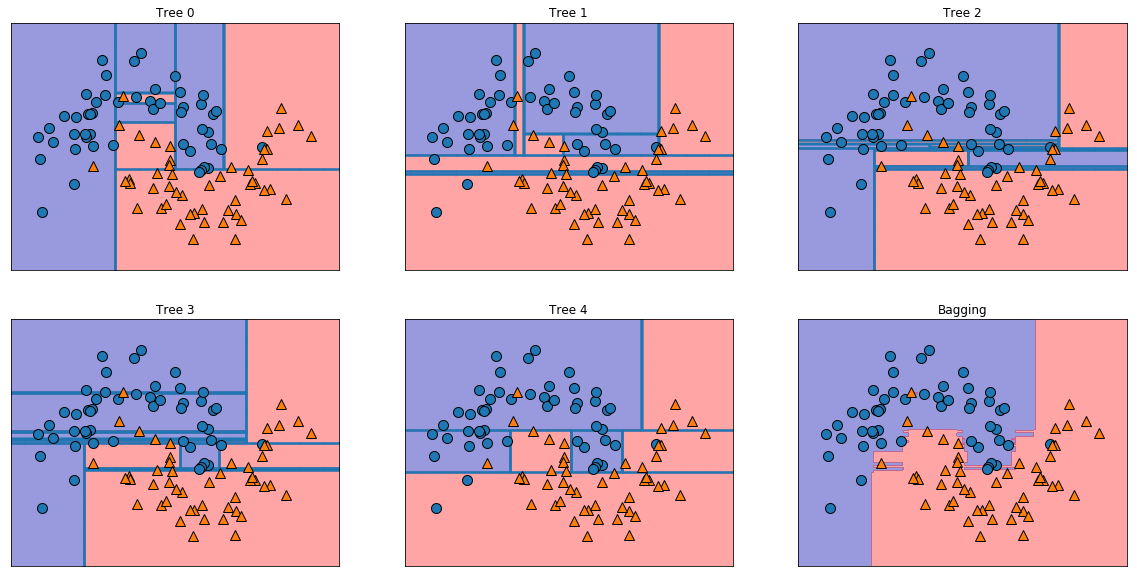

In [23]:
import matplotlib.pyplot as plt
import mglearn

fig,axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}" .format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1], ym)
plt.show()

## Random Forest

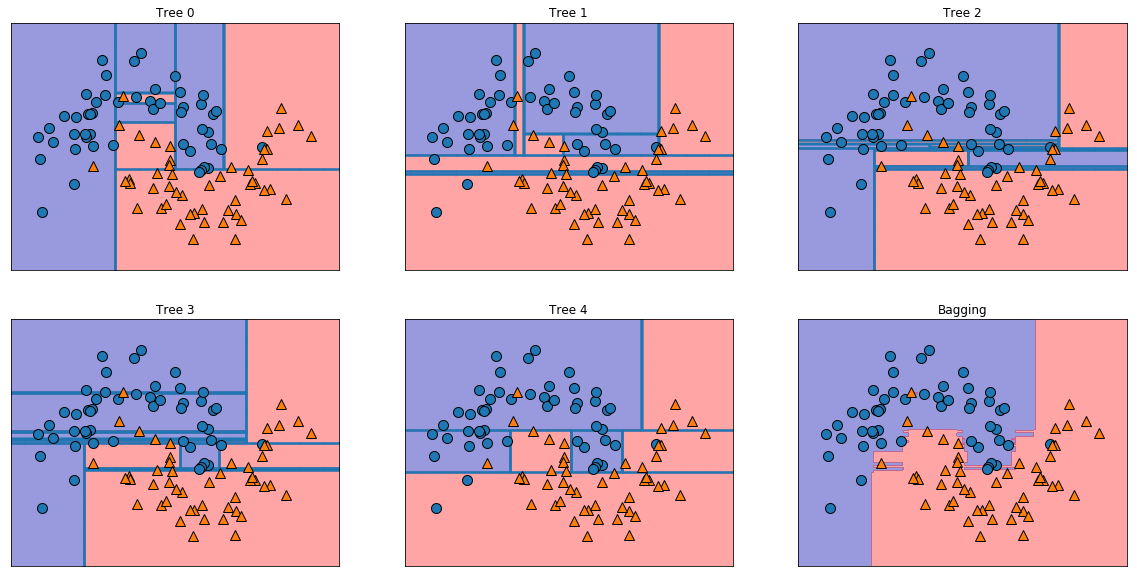

In [24]:
import matplotlib.pyplot as plt
import mglearn
from sklearn.ensemble import RandomForestClassifier


fig,axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}" .format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1], ym)
plt.show()

### Decision tree bagging과 random forest 비교

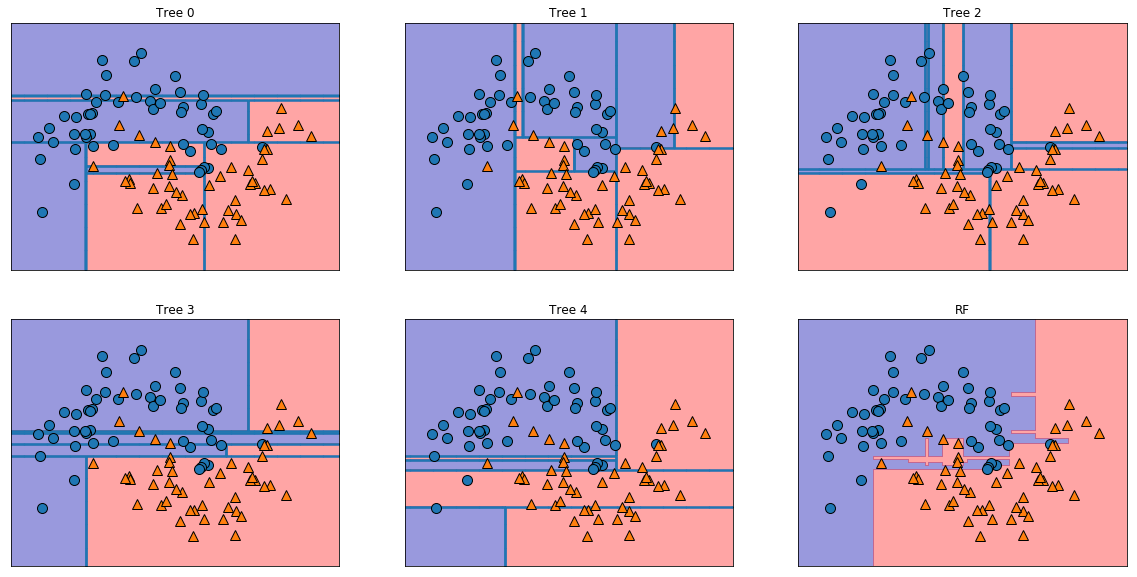

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, stratify=ym, random_state=42)

rf = RandomForestClassifier(n_estimators=5, max_features=1, random_state=2)
rf.fit(Xm_train, ym_train)
fig,axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(), rf.estimators_)):
    ax.set_title("Tree {}" .format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(rf, Xm, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("RF")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1], ym)
plt.show()

### Feature들의 중요도를 알려주는 코드:

In [36]:
from sklearn.datasets import load_iris
iris=load_iris()
rnd_clf=RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, importance in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, "=", importance)

sepal length (cm) = 0.11249225099876374
sepal width (cm) = 0.023119288282510326
petal length (cm) = 0.44103046436395765
petal width (cm) = 0.4233579963547681


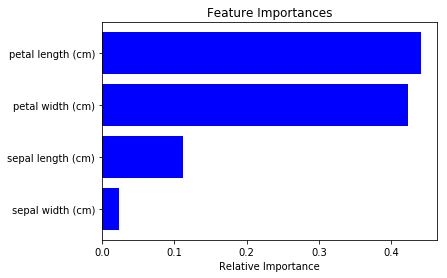

In [37]:
import numpy as np
features = iris['feature_names']
importances = rnd_clf.feature_importances_
indices=np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Boosting

In [52]:
from numpy import *
def loadSimpData():
    datMat = matrix([[1.,2.1], 
                    [2.,1.1],
                    [1.3,1.],
                    [1.,1.],
                    [2.,1.]])
    classLabels=[1.0,1.0,-1.0,-1.0,1.0]
    return datMat, classLabels


In [63]:
datMat, classLabels = loadSimpData()
print(datMat, classLabels)

[[1.  2.1]
 [2.  1.1]
 [1.3 1. ]
 [1.  1. ]
 [2.  1. ]] [1.0, 1.0, -1.0, -1.0, 1.0]


In [51]:
"""
for i in range(len(classLabels)):
    if classLabels[i]==1.0:
        xcord1.append(datMat[i,0]), ycord1.append(datMat[i,1])
    else:
        xcord0.append(datMat[i,0], ycord0.append(datMat[i,1]))
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(xcord0, ycord0, marker='s', s=90)
ax.scatter(xcord1, ycord1, marker='o', c='red')
plt.title('Decision Stump Test Data')
plt.show()
        """    

"\nfor i in range(len(classLabels)):\n    if classLabels[i]==1.0:\n        xcord1.append(datMat[i,0]), ycord1.append(datMat[i,1])\n    else:\n        xcord0.append(datMat[i,0], ycord0.append(datMat[i,1]))\nfig=plt.figure()\nax=fig.add_subplot(111)\nax.scatter(xcord0, ycord0, marker='s', s=90)\nax.scatter(xcord1, ycord1, marker='o', c='red')\nplt.title('Decision Stump Test Data')\nplt.show()\n        "

In [64]:
def stumpClassify(dataMatrix, dimen, threshVal, threshIneq): # just classify the data
    retArray = ones((shape(dataMatrix)[0],1))
    if threshIneq == 'lt': # less than 을 줄여서 쓴말
        retArray[dataMatrix[:,dimen] <=threshVal] = -1.0
    else: 
        retArray[dataMatrix[:,dimen] > threshVal] = -1.0
    return retArray

In [73]:
def buildStump(dataArr, classLabels, D):
    dataMatrix = mat(dataArr); labelMat = mat(classLabels).T
    m,n=shape(dataMatrix)
    numSteps = 10.0;    bestStump={};    bestClasEst = mat(zeros((m,1)))
    minError = inf
    for i in range(n):
        rangeMin = dataMatrix[:,i].min(); rangeMax = dataMatrix[:,1].max();
        stepSize = (rangeMax-rangeMin)/numSteps
        for j in range(-1, int(numSteps)+1):
            for inequal in ['lt', 'gt']:
                threshVal = (rangeMin + float(j) * stepSize)
                predictedVals = stumpClassify(dataMatrix, i, threshVal, inequal)
                errArr = mat(ones((m,1)))
                errArr[predictedVals == labelMat] = 0
                weightedError = D.T*errArr
                print("split: dim{}, thresh {}, \
                thresh inequal: {}, the weighted error is {}" \
                     .format(i, threshVal, inequal, weightedError))
                if weightedError < minError:
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim']=i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump, minError, bestClasEst

In [74]:
D = mat(ones((5,1))/5)
# print(datMat, classLabels,D)
buildStump(datMat, classLabels, D)


split: dim0, thresh 0.89,                 thresh inequal: lt, the weighted error is [[0.4]]
split: dim0, thresh 0.89,                 thresh inequal: gt, the weighted error is [[0.6]]
split: dim0, thresh 1.0,                 thresh inequal: lt, the weighted error is [[0.4]]
split: dim0, thresh 1.0,                 thresh inequal: gt, the weighted error is [[0.6]]
split: dim0, thresh 1.11,                 thresh inequal: lt, the weighted error is [[0.4]]
split: dim0, thresh 1.11,                 thresh inequal: gt, the weighted error is [[0.6]]
split: dim0, thresh 1.22,                 thresh inequal: lt, the weighted error is [[0.4]]
split: dim0, thresh 1.22,                 thresh inequal: gt, the weighted error is [[0.6]]
split: dim0, thresh 1.33,                 thresh inequal: lt, the weighted error is [[0.2]]
split: dim0, thresh 1.33,                 thresh inequal: gt, the weighted error is [[0.8]]
split: dim0, thresh 1.44,                 thresh inequal: lt, the weighted error i

({'dim': 0, 'thresh': 1.33, 'ineq': 'lt'}, matrix([[0.2]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

In [79]:
def adaBoostTrainDS(dataArr, classLabels, numlt=40):
    weakClassArr=[]
    m=shape(dataArr)[0]
    D=mat(ones((m,1))/m)
    aggClassEst = mat(zeros((m,1)))
    for i in range(numlt):
        bestStump,error, classEst = buildStump(dataArr, classLabels, D)
        print("D:{}" .format(D.T))
        alpha=float(0.5*log((1.0-error)/max(error, 1e-16)))
        bestStump['alpha'] = alpha
        weakClassArr.append(bestStump)
        print("classEst: {}".format(classEst.T))
        expon=multiply(-1*alpha*mat(classLabels).T,classEst)
        D=multiply(D,exp(expon))
        D=D/D.sum()
        aggClassEst += alpha*classEst
        print("aggClassEst:{}".format(aggClassEst.T))
        aggErrors=multiply(sign(aggClassEst ) != mat(classLabels).T, ones((m,1)))
        errorRate = aggErrors.sum()/m
        print("total error:{}".format(errorRate))
        if errorRate==0.0: break
    return weakClassArr

In [80]:
adaBoostTrainDS(datMat, classLabels,9)

split: dim0, thresh 0.89,                 thresh inequal: lt, the weighted error is [[0.4]]
split: dim0, thresh 0.89,                 thresh inequal: gt, the weighted error is [[0.6]]
split: dim0, thresh 1.0,                 thresh inequal: lt, the weighted error is [[0.4]]
split: dim0, thresh 1.0,                 thresh inequal: gt, the weighted error is [[0.6]]
split: dim0, thresh 1.11,                 thresh inequal: lt, the weighted error is [[0.4]]
split: dim0, thresh 1.11,                 thresh inequal: gt, the weighted error is [[0.6]]
split: dim0, thresh 1.22,                 thresh inequal: lt, the weighted error is [[0.4]]
split: dim0, thresh 1.22,                 thresh inequal: gt, the weighted error is [[0.6]]
split: dim0, thresh 1.33,                 thresh inequal: lt, the weighted error is [[0.2]]
split: dim0, thresh 1.33,                 thresh inequal: gt, the weighted error is [[0.8]]
split: dim0, thresh 1.44,                 thresh inequal: lt, the weighted error i

[{'dim': 0, 'thresh': 1.33, 'ineq': 'lt', 'alpha': 0.6931471805599453},
 {'dim': 1, 'thresh': 1.0, 'ineq': 'lt', 'alpha': 0.9729550745276565},
 {'dim': 0, 'thresh': 0.89, 'ineq': 'lt', 'alpha': 0.8958797346140273}]

In [82]:
def adaClassify(datToClass, classifierArr):
    dataMatrix = mat(datToClass)
    m=shape(dataMatrix)[0]
    aggClassEst = mat(zeros((m,1)))
    for i in range(len(cassifierArr)):
        classEst = stumpClassify(dataMatrix, classifierArr[i]['dim'],\
                                classifierArr[i]['thresh'],\
                                classifierArr[i]['ineq'])
        aggClassEst += classifierArr[i]['alpha']*classEst
        print(aggClassEst)
    return sign(aggClassEst)

classifierArr = adaBoostTrainDS(datMat, classLabels, 30)

split: dim0, thresh 0.89,                 thresh inequal: lt, the weighted error is [[0.4]]
split: dim0, thresh 0.89,                 thresh inequal: gt, the weighted error is [[0.6]]
split: dim0, thresh 1.0,                 thresh inequal: lt, the weighted error is [[0.4]]
split: dim0, thresh 1.0,                 thresh inequal: gt, the weighted error is [[0.6]]
split: dim0, thresh 1.11,                 thresh inequal: lt, the weighted error is [[0.4]]
split: dim0, thresh 1.11,                 thresh inequal: gt, the weighted error is [[0.6]]
split: dim0, thresh 1.22,                 thresh inequal: lt, the weighted error is [[0.4]]
split: dim0, thresh 1.22,                 thresh inequal: gt, the weighted error is [[0.6]]
split: dim0, thresh 1.33,                 thresh inequal: lt, the weighted error is [[0.2]]
split: dim0, thresh 1.33,                 thresh inequal: gt, the weighted error is [[0.8]]
split: dim0, thresh 1.44,                 thresh inequal: lt, the weighted error i

0 
 AxesSubplot(0.125,0.536818;0.227941x0.343182) 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1608637542, splitter='best')
1 
 AxesSubplot(0.398529,0.536818;0.227941x0.343182) 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1273642419, splitter='best')
2 
 AxesSubplot(0.672059,0.536818;0.227941x0.343182) 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
       

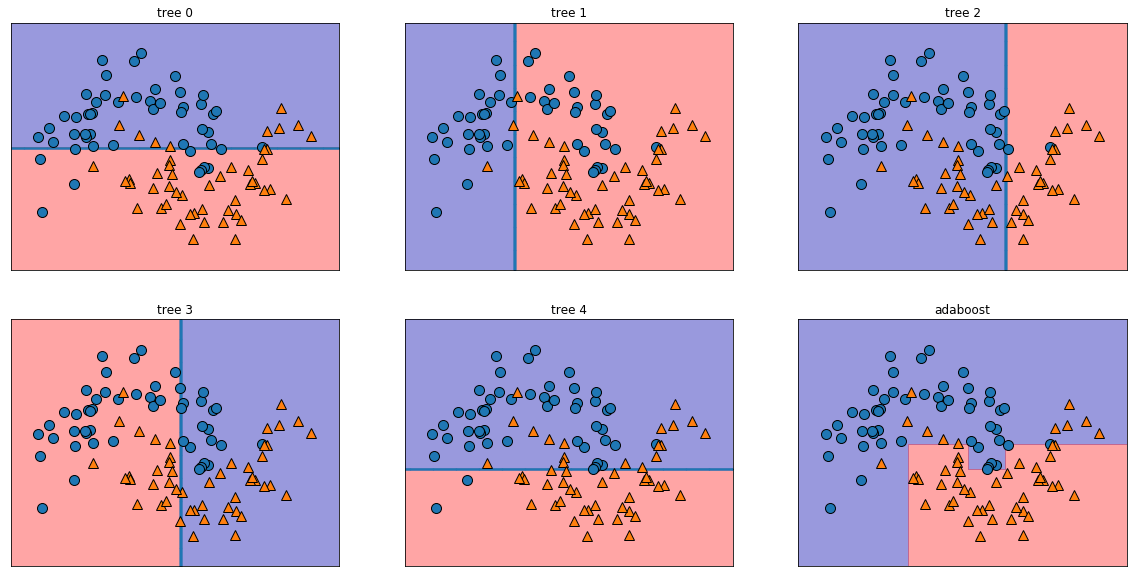

In [86]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train)

fig,axes=plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    print(i,"\n", ax,"\n", tree)
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title('adaboost')
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()